In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import platform
from platform import python_version
import jupyterlab
import datetime


%matplotlib inline
now = datetime.datetime.now()

print("Current date and time:")
print(now.strftime("%Y-%m-%d %H:%M"))

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
print("seaborn==%s" % sb.__version__)

Current date and time:
2020-01-27 15:21
System
os name: posix
system: Darwin
release: 19.2.0

Python
version: 3.7.4

Python Packages
jupterlab==1.1.4
pandas==0.25.1
numpy==1.17.2
seaborn==0.9.0


In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [4]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

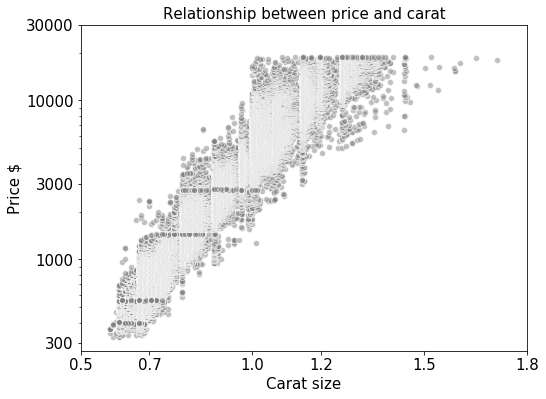

In [5]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price',
            color='grey', alpha=0.5, marker='o',edgecolors="w")

plt.xlabel('Carat size', fontsize=15)

plt.ylabel('Price $', fontsize=15)
plt.yscale('log')

# specify axis tick labels after log transformation
yticks = [300, 1000, 3000, 10000, 30000]
xticks = [0.5, 0.7, 1, 1.2, 1.5, 1.8]
ax.set_yticks(yticks)
ax.set_xticks(xticks)

# turn off scientific notation: first,convert to ScalarFormater
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain')

# increase tick font sizes
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)

plt.title('Relationship between price and carat', fontsize=15)

plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span style="color:blue">Does the plot has an informative title?</span>
- <span style="color:blue">Are the axis labels informative?</span>
- <span style="color:blue">Are the tick values interpretable?</span>
- <span style="color:blue">Do we need to worry about any of the plot aesthetics?</span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span style="color:blue">The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.</span>
- <span style="color:blue">As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span style="color:blue">There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [6]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

In [7]:
diamonds.loc[diamond_flag,:].shape

(5229, 11)

In [8]:
diamonds[diamonds['carat']>=0.99].shape

(19083, 11)

In [9]:
diamonds.shape

(53940, 11)

In [10]:
diamonds[(diamonds['carat']>=0.99) & (diamonds['carat'] <=1.03)].shape

(5229, 11)

In [11]:
diamonds.loc[(diamonds['carat']>=0.99) & (diamonds['carat'] <=1.03),:]

,carat,cut,color,clarity,depth,table,price,x,y,z,cr_carat
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94,1.003322
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,1.003322
242,1.01,Premium,H,SI2,62.7,59.0,2788,6.31,6.22,3.93,1.003322
284,1.00,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83,1.000000
298,1.01,Fair,E,SI2,67.4,60.0,2797,6.19,6.05,4.13,1.003322
...,...,...,...,...,...,...,...,...,...,...,...
53692,1.00,Good,F,I1,64.2,59.0,2717,6.26,6.30,4.03,1.000000
53745,1.00,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91,1.000000
53793,1.01,Very Good,I,SI1,63.3,59.0,2730,6.26,6.22,3.95,1.003322
53863,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13,1.000000


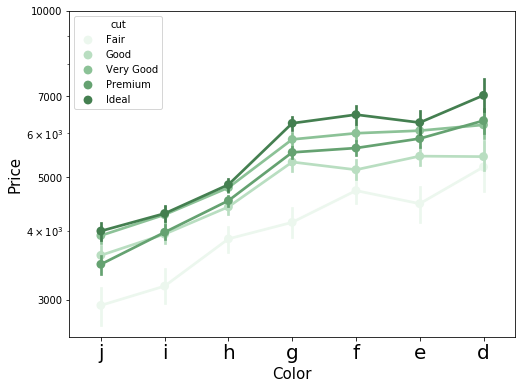

In [12]:
fig, ax1=plt.subplots(figsize = (8,6))

sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut', 
             palette=sb.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95),
             dodge=False)

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')

# setup axis labels
ax1.set_xlabel(xlabel='Color',size=15)
ax1.set_ylabel(ylabel='Price', size=15)


# turn off scientific notation: first,convert to ScalarFormater
from matplotlib.ticker import ScalarFormatter
for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax1.ticklabel_format(style ='plain', axis = 'both')


# adjust axis scale
yticks =[3000, 5000, 7000, 10000]
ax1.set_yticks(yticks)



# adjust tick labels
plt.xticks([0,1,2,3,4,5,6],['j','i','h','g','f','e','d'])
for xtick in ax1.get_xticklabels():
    xtick.set_fontsize (20)

ax.legend(title='Quality', fontsize=12)
ax.set_title('Color vs Price', size=15)

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span style="color:blue"> Don't forget to provide an informative title and axis labels.</span>

Price vs. Color, Cut: Polishing comment 2: <span style="color:blue"> There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the project lesson! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.